<a href="https://colab.research.google.com/github/vassilyf/ml/blob/main/series_homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

In [ ]:
base = "/Users/fvb/Projects/jupyter/series/war_n_peace/"
files = [
    "tom_1.txt",
    "tom_2.txt",
    "tom_3.txt",
    "tom_4.txt"
]

In [ ]:
RUS = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUS)}

In [ ]:
full_text = ""
for file in files:
    with open(base + file) as f:
        full_text += f.read()

print(len(full_text))

2993415


In [ ]:
_RE_COMBINE_WHITESPACE = re.compile(r"\s+")
RUS_N = RUS + '\n'
clean_text = ''.join([c for c in full_text.lower() if c in RUS_N])
clean_text = _RE_COMBINE_WHITESPACE.sub(" ", clean_text).strip()
print(clean_text[0:100])

лев толстой война и мир том том часть первая часть орая часть третья том лев николаевич толстой войн


In [ ]:
probabilities = np.zeros((len(RUS), len(RUS)))
for cp, cn in zip(clean_text[:-1], clean_text[1:]):
    probabilities[POS[cp], POS[cn]] += 1
#print(probabilities.shape)

#probabilities
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))

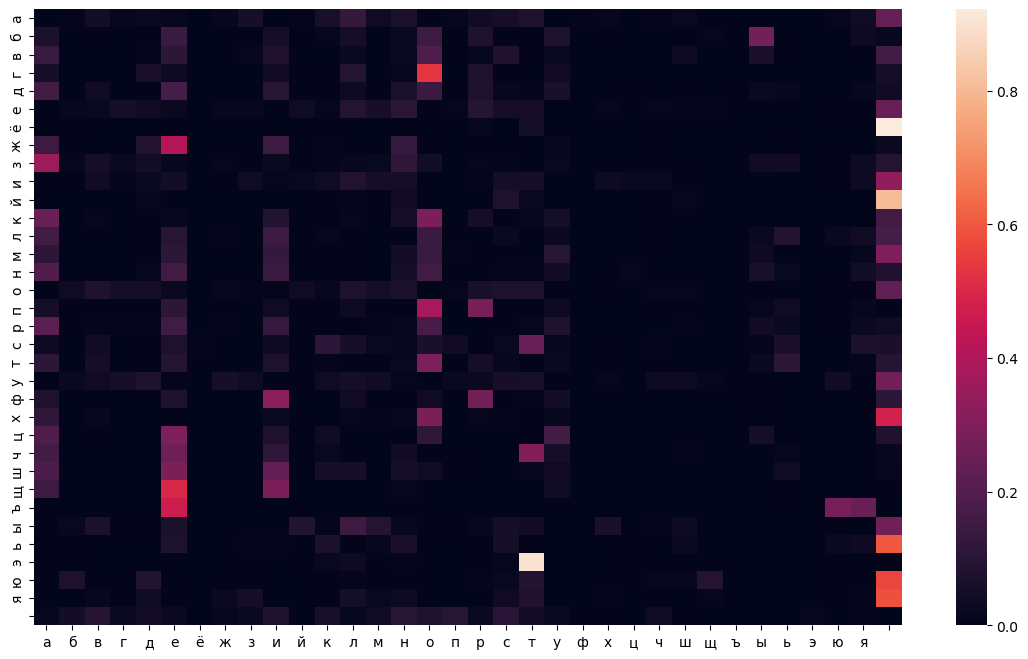

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [ ]:
# Посчитайте вероятность встретить строку из четырёх символов,
# которая начинается на букву «П» и заканчивается на букву «Р».
start = POS['п']
end = POS['р']
prior = 1. / len(RUS)
pr_total = 0
for c1 in RUS:
    for c2 in RUS:
        pr = prior * probabilities[start, POS[c1]] * probabilities[ POS[c1], POS[c2]] * probabilities[POS[c2], end]
        pr_total += pr
print(pr_total)

0.0009527010137051277


In [ ]:
# Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов

s = []
start = np.random.choice(list(RUS[:-1]))
length = 8
s.append(start)
for i in range(length-1):
    index = POS[s[i]]
    next_char = ' '
    while (next_char == ' '):
        next_char = np.random.choice(list(RUS), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

огойнибо


In [ ]:
# Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.

from hmmlearn.hmm import GaussianHMM

series = pd.read_csv("/Users/fvb/Projects/jupyter/series/1/Series/daily-total-female-births-in-cal.csv")["Count"]
values = series.values.reshape(-1,1)

for n in range(1, 15):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))


1 -1245.3909354932182
2 -1231.4094725792336
3 -1224.2548563310424
4 -1221.8024441804612
5 -1215.8926512407654
6 -1210.25101925431
7 -1210.3072604277168
8 -1200.1725500352632
9 -1209.9413164130128
10 -1188.7946770849267
11 -1190.3489063365735
12 -1175.3128119433068
13 -1175.2692459935333
14 -1116.0718651622701


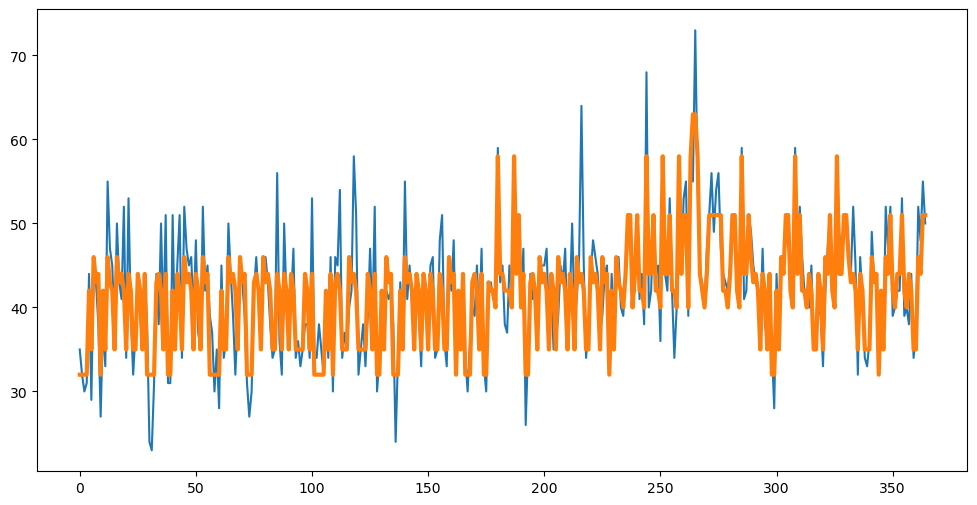

In [ ]:
# Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

model = GaussianHMM(n_components=12,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)